<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/python_graphtheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

python で graph theory のグラフをどう描くか、試行錯誤。 実験

参考
1. networkx 本家 tutorial  
https://networkx.org/documentation/stable/tutorial.html
1. グラフ理論  
Lecture 3: Graphs, Relations and a Matrix  
http://schmidt.ucg.ie/cs4423/networks03.pdf
1. sagemath での描き方 sage: g=graphs.GrotzschGraph()
1. https://qiita.com/kzm4269/items/081ff2fdb8a6b0a6112f <=qiita

1. https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
1. https://www.python-course.eu/networkx.php
1. https://igraph.org/python/doc/tutorial/tutorial.html igraph tutorial
1. plotly, pypi



networkx で作ったグラフ理論のグラフを colab (jupyter) で表示するのに

1. matplotlib.pyplot の show を使う方法
1. networkx の draw を使う方法
1. IPython.display の SVG と Image を使う方法
1. pygraphviz を使う方法

の 4通りある。

基本的に matplotlib の show を使う。  

networkx の draw は裏で matplotlib を使っているので、出力は同じと思われる。

pygraphviz はツールのインストールが必要なので colab で使うのは現実的でない。

SVG に変換する networkx の関数は裏で pygraphiviz を使っていて、pygraphviz のインストールが必要である。

In [ ]:
import networkx as nx
nx.__version__

'2.5'

In [ ]:
# pygraphviz を使いたい場合次のようにすれば colab (jupyter) で描ける
# !apt install libgraphviz-dev
# !pip install pygraphviz
#
# としておいて別のコードセルで
#
# import pygraphviz
# import networkx as nx
# from IPython.display import Image
# G = nx.DiGraph()
# data_array = [1,2,3,4,5,6,7,8]
# nx.add_cycle(G, data_array)
# Image(nx.nx_agraph.view_pygraphviz(G, prog='fdp')[0])
#
# nx.nx_agraph.view_pygraphviz(G, prog='fdp') の結果が (png, object) のタプルなので [0] で png を取り出している
# png の表示方法に IPython.display のt Image を使ったがもっと一般的な方法があるかもしれない

# グラフを描く

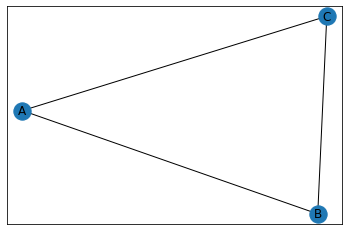

In [ ]:
# グラフを描く
import networkx as nx
G = nx.Graph()
data_array =['A','B','C']
nx.add_cycle(G, data_array)
nx.draw_networkx(G)
plt.show (G)

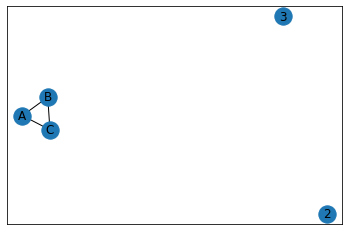

In [ ]:
# 実験 数字と混ぜられるか
import networkx as nx
G = nx.Graph()
data_array =['A','B','C']
nx.add_cycle(G, data_array)
G.add_nodes_from([2, 3])
nx.draw_networkx(G)
plt.show (G)

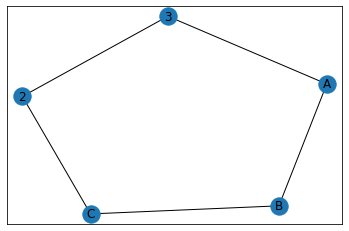

In [ ]:
# 実験 数字と混ぜられるか
import networkx as nx
G = nx.Graph()
data_array =['A','B','C',2,3]
nx.add_cycle(G, data_array)
nx.draw_networkx(G)
plt.show (G)

# 有向グラフ DiGraph

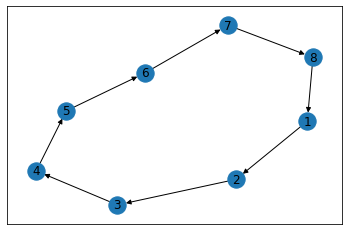

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # 有向グラフ (Directed Graph)
data_array = [1,2,3,4,5,6,7,8]

nx.add_cycle(G, data_array)

nx.draw_networkx(G)
plt.show (G)

In [ ]:
# 上のセルと同じものを SVG にしてから出力
# pygraphviz をインストールしないとエラーになる
# import networkx as nx
# from IPython.display import SVG

# G = nx.DiGraph()  # 有向グラフ (Directed Graph)
# data_array = [1,2,3,4,5,6,7,8]

# nx.add_cycle(G, data_array)

# display(SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg')))

# いまここ

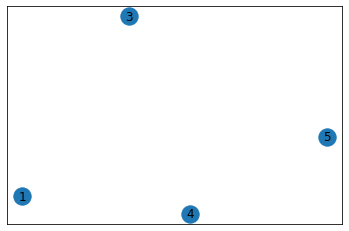

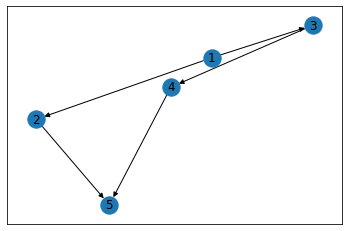

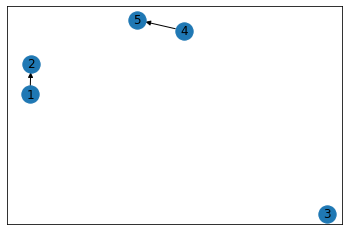

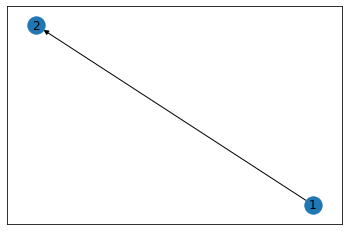

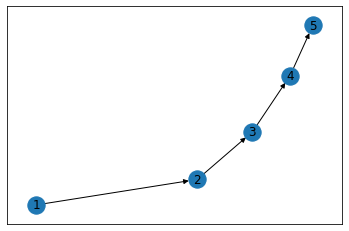

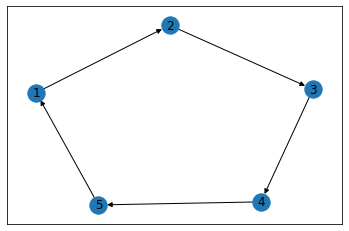

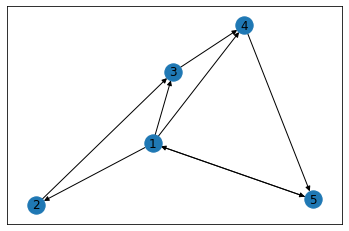

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()  # 有向グラフ (Directed Graph)

# 頂点の追加
G.add_node(1)                
G.add_nodes_from([3, 4, 5])
plt.show (nx.draw_networkx(G))

# 辺の追加 (頂点も必要に応じて追加される)
G.add_edge(1, 2)                                    
G.add_edges_from([(1, 3), (2, 5), (3, 4), (4, 5)])
plt.show (nx.draw_networkx(G))

# 辺の削除
G.remove_edge(3, 4)                    
G.remove_edges_from([(1, 3), (2, 5)])
plt.show (nx.draw_networkx(G))

# 頂点の削除 (削除された頂点に接続されている辺も削除される)
G.remove_node(5)
G.remove_nodes_from([3, 4])
plt.show (nx.draw_networkx(G))

# 指定したパス上の頂点と辺を追加
nx.add_path(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5
plt.show (nx.draw_networkx(G))

# 指定した閉路上の頂点と辺を追加
nx.add_cycle(G, [1, 2, 3, 4, 5])  # 1 → 2 → 3 → 4 → 5 → 1
plt.show (nx.draw_networkx(G))

# 放射状に頂点と辺を追加
nx.add_star(G, [1, 2, 3, 4, 5])  # 1 → 2, 1 → 3, 1 → 4, 1 → 5
plt.show (nx.draw_networkx(G))


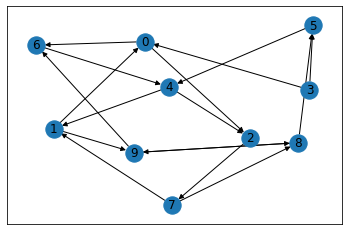

In [ ]:
# 実験
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.draw_networkx(G)
plt.show()

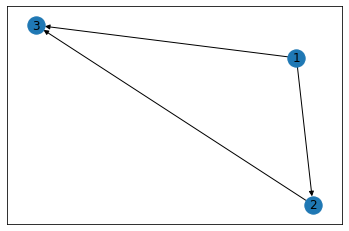

{1: {'a': 'Alice'}, 2: {}, 3: {}}
{(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}
{1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
{1: {}, 2: {1: {'b': 'Bob'}}, 3: {1: {'d': 'Dave'}, 2: {'c': 'Carol'}}}


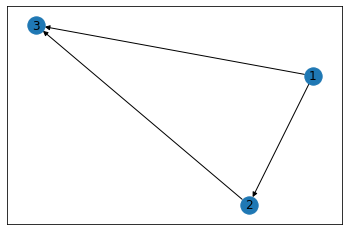

In [ ]:
# 実験 頂点の名前を変えるにはどうしたらよいか
# 以下の方法では変わらない
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# G.nodes[頂点][属性キー] = 属性値
G.nodes[1]['a'] = 'Alice'
nx.draw_networkx(G)
plt.show()

# G.edges[辺][属性キー] = 属性値
G.edges[1, 2]['b'] = 'Bob'

# G.succ[始点][終点][属性キー] = 属性値
G.succ[2][3]['c'] = 'Carol'

# G.pred[終点][始点][属性キー] = 属性値
G.pred[3][1]['d'] = 'Dave'

print(dict(G.nodes))
# {1: {'a': 'Alice'}, 2: {}, 3: {}}

print(dict(G.edges))
# {(1, 2): {'b': 'Bob'}, (1, 3): {'d': 'Dave'}, (2, 3): {'c': 'Carol'}}

print(G.succ)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}

print(G.pred)
# {1: {2: {'b': 'Bob'}, 3: {'d': 'Dave'}}, 2: {3: {'c': 'Carol'}}, 3: {}}
nx.draw_networkx(G)
plt.show()

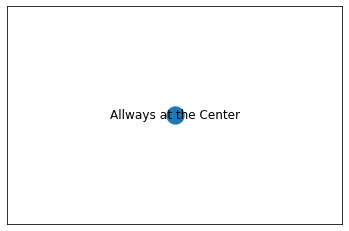

In [ ]:
# 実験 node の名前が長かった場合
import networkx as nx
G = nx.Graph()
G.add_node("Allways at the Center")
nx.draw_networkx(G)
plt.show (G)

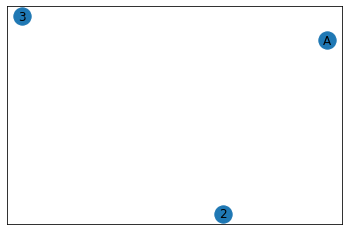

In [ ]:
# node だけを追加する
import networkx as nx
G = nx.Graph()
G.add_node("A")
G.add_nodes_from([2, 3])
nx.draw_networkx(G)
plt.show (G)

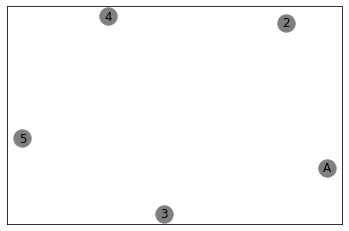

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_node("A")
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {"node_color": "red"}), # ここで色を指定しても反映しない
    (5, {"color": "green"}),
])
nx.draw_networkx(G, node_color='grey')
plt.show (G)

# node の属性はどうしたら反映されるか。 とりあえず色が変わらない。

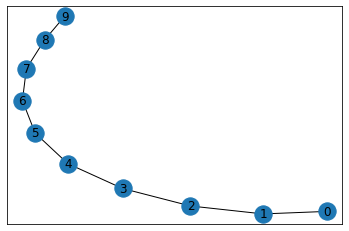

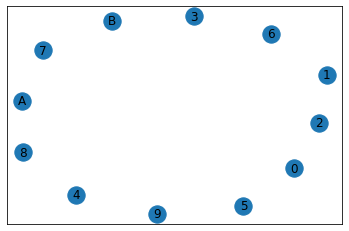

In [ ]:
# 2つのグラフの node を足す
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_node("A")
G.add_node("B")
H = nx.path_graph(10)
nx.draw_networkx(H)
plt.show (H)

G.add_nodes_from(H)

nx.draw_networkx(G)
plt.show (G)


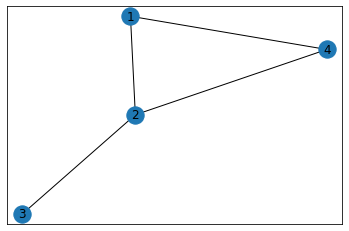

In [ ]:
# 辺を追加する add_edge(,), add_edges_from([()])
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
G.add_edges_from([(4,1),(4,2)])
nx.draw_networkx(G)
plt.show (G)

# グラフ理論と線形代数と集合論

graph theory , linear algebra, matrix multiplication , set theory


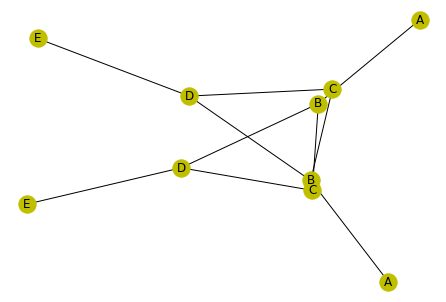

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
G = nx.Graph(["AB","BC","BD","CD","DE"])
opts = {"with_labels": True, "node_color": 'Y'}
nx.draw(G, **opts)
nx.draw_networkx(G, **opts)
plt.show(G)

# いまここ

# いまここ最後